<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_13A_Introducci%C3%B3n_a_Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas en Regresiones Lineales

Este cuaderno contiene una explicación y ejemplo práctico de las principales pruebas estadísticas que se deben realizar en los modelos de regresión lineal.

Estas pruebas NO sustituyen al Análisis Exploratorio de Datos (EDA) ni al preprocesamiento. Más bien, son una etapa posterior que se realiza tras entrenar el modelo.

## Flujo típico de trabajo:
1. EDA y visualización
2. Preprocesamiento de datos
3. División entre entrenamiento y prueba (si aplica)
4. Entrenamiento del modelo de regresión
5. Evaluación de supuestos clásicos y significancia de predictores (este cuaderno)
6. Interpretación y ajustes finales

## Teoría de Supuestos Clásicos y Evaluaciones

### 1. Multicolinealidad
- **VIF (Factor de Inflación de la Varianza)**: Evalúa cuánto se infla la varianza de un coeficiente por la colinealidad. VIF > 5 o 10 puede indicar un problema.

  Fórmula:
  $$  VIF_j = \frac{1}{1 - R_j^2}$$

- **Tolerancia**:
  $$\text{Tolerancia}_j = \frac{1}{VIF_j}$$

- VIF > 5 o Tolerancia < 0.2 puede indicar multicolinealidad severa.

- **Índice de Tolerancia**: Es el inverso del VIF. Tolerancia = 1 / VIF. Valores cercanos a 0 indican alta colinealidad.

### 2. Normalidad de los errores
- **QQ-Plot**: Permite verificar si los residuos siguen una distribución normal. Se espera que los puntos sigan la línea diagonal.

### 3. Homocedasticidad
- **Gráfico de residuos vs. valores ajustados**: Permite evaluar si la varianza de los residuos es constante (homocedasticidad). Una nube aleatoria indica cumplimiento.

### 4. Independencia de errores
- **Prueba de Durbin-Watson**: Evalúa si hay autocorrelación en los residuos. Un valor cercano a 2 indica independencia.

### 5. Significancia de los predictores
- Evaluada mediante el **valor p** en el resumen del modelo. Un valor p < 0.05 sugiere que el predictor es estadísticamente significativo.

### 6. Error Estándar Residual (RSE)
- Mide la desviación promedio entre los valores observados y los predichos.

$RSE = \sqrt{ \frac{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }{n - p - 1} }$


### 7. Coeficiente de Determinación (R²)
- Indica la proporción de la variabilidad de la variable dependiente que es explicada por el modelo.
- $R^2 = 1 - \frac{RSS}{TSS}
\quad \text{o} \quad$
$R^2 = \frac{\sum (\hat{y}_i - \bar{y})^2}{\sum (y_i - \bar{y})^2}$

* TSS – Total Sum of Squares (Suma Total de Cuadrados)

* RSS – Residual Sum of Squares (Suma de Cuadrados de los Residuos)

- Un valor cercano a 1 indica un buen ajuste del modelo.

#Ejemplo práctico en Python

In [1]:
#Ejemplo práctico de evaluación de supuestos en regresión lineal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [2]:
# Crear datos sintéticos
np.random.seed(42)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.05, 100)
X3 = np.random.rand(100)
y =(5 * X1 + 2 * X3 + np.random.normal(0, 0.1, 100))*10

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})
df

,X1,X2,X3
0,0.374540,0.378892,0.794811
1,0.950714,0.935764,0.502637
2,0.731994,0.736582,0.576904
3,0.598658,0.499280,0.492518
4,0.156019,0.145035,0.195243
...,...,...,...
95,0.493796,0.453005,0.737897
96,0.522733,0.518878,0.554354
97,0.427541,0.444599,0.611721
98,0.025419,0.039254,0.419600


In [ ]:
df.describe()

,X1,X2,X3
count,100.000000,100.000000,100.000000
mean,0.470181,0.470127,0.528292
std,0.297489,0.294134,0.287695
min,0.005522,-0.000744,0.015457
25%,0.193201,0.219260,0.291829
50%,0.464142,0.447287,0.545936
75%,0.730203,0.736754,0.776198
max,0.986887,1.025978,0.990054


In [3]:
#y en entero
y = y.astype(int)
y

array([35, 56, 48, 40, 10, 22,  5, 42, 42, 37, 21, 66, 59, 18, 10, 26, 24,
       45, 39, 32, 36, 14, 31, 24, 26, 51, 30, 38, 43,  2, 42, 28,  6, 57,
       65, 54, 28, 19, 41, 27, 23, 41, 19, 64, 22, 42, 32, 39, 41, 25, 67,
       44, 55, 46, 41, 47, 14, 21,  9, 28, 20, 14, 58, 24, 16, 38, 21, 46,
       15, 49, 40, 21, 11, 54, 49, 55, 48,  9, 34, 11, 51, 32, 17, 21, 31,
       30, 44, 34, 47, 28, 15, 48, 50, 33, 57, 40, 38, 33,  9,  9])

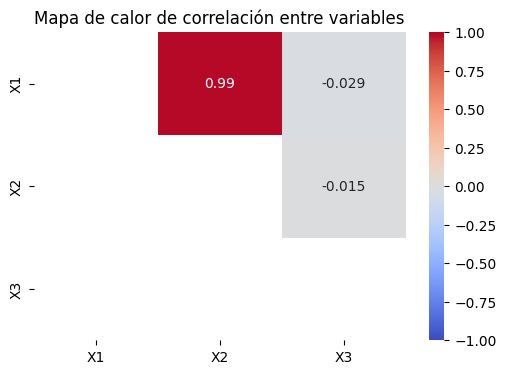

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=np.tril(corr_matrix))
plt.title("Mapa de calor de correlación entre variables")
plt.show()


Si encuentras una correlación de 0.99 entre dos variables (por ejemplo, entre X1 y X2), significa que están altamente colineadas. Esto puede ser problemático en regresión lineal, porque:

##Problemas de una correlación tan alta:
**Inestabilidad de los coeficientes**: El modelo no sabe bien a cuál variable atribuir el efecto sobre y.

**Coeficientes inflados o con signos contrarios:** Aunque ambas estén relacionadas con la variable objetivo, los coeficientes pueden volverse contraintuitivos.

Inflación del error estándar → valores p altos, lo que hace parecer que una variable "no sirve" cuando en realidad está colineada con otra.

Verificaremos mas adelante el VIF (Variance Inflation Factor) si la variable está causando multicolinealidad.



In [ ]:
#Agreguemos una columna de contante al dataframe para usar statmodel
X = sm.add_constant(df)
X

In [ ]:
#El modelo OLS es statmodel es un modelo para regresión lineal multiple basado en minimos cuadrados ordinarios.
model = sm.OLS(y, X).fit()

In [ ]:
model.params

## Resumen del Modelo

In [ ]:
# Resumen del modelo (incluye valores p y R²)
print(model.summary())

# Conclusiones del Modelo OLS

## **1. Bondad de ajuste**

**R-squared** = 0.997, **Adjusted R²** = 0.997

Excelente ajuste. El modelo explica el 99.7% de la variabilidad en la variable dependiente y.

##**2. Significancia global del modelo**
**F-statistic:** 1.028e+04, **p-value (Prob F):** 3.15e-120

El modelo completo es estadísticamente significativo (p ≪ 0.05).

##**3. Significancia individual de los predictores**

|Variable|Coef.|P-valor|¿Significativo?|
|----------|----------|----------|----------|
|X1|+5.33|0.000|Sí|
|X2|–0.35|0.084|No (p > 0.05)|
|X3|+2.03|0.000|Sí|

X1 y X3 son altamente significativos.

X2 no es estadísticamente significativo (p ≈ 0.084), lo cual puede deberse a colinealidad con X1. *texto en cursiva*

##**4. Multicolinealidad potencial**

Aunque aquí no se muestra VIF, tú ya sabes que X1 y X2 están correlacionados ≈ 0.99.
Y además ves que:

* X2 tiene coeficiente negativo,
* No es significativo,
* Pero sí tiene un valor t alto…

Esto indica multicolinealidad, que distorsiona las estimaciones. Deberías eliminar X2 o usar Lasso/Ridge.

##**5. Independencia de los errores**

Durbin-Watson = 2.324
Está adecuado. Indica que los residuos no están autocorrelacionados.

##**6. Normalidad de los residuos**
Omnibus = 1.66, Jarque-Bera p = 0.574

Los residuos siguen una distribución normal (p > 0.05), otro punto a favor.

##**7. Constante (intercepto)**
No significativa (p = 0.673). **No es grave**. A veces el intercepto no es relevante.

#Recomendación final
El modelo es muy bueno, pero:

* Revisar la colinealidad entre X1 y X2.

* Podría eliminar X2 y volver a entrenar para ver si el modelo se mantiene fuerte sin multicolinealidad.

* También puede probar con regresión regularizada (Ridge o Lasso) si quieres mantener todas las variables sin eliminar.

In [ ]:
# VIF e Índice de Tolerancia
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data['Tolerancia'] = 1 / vif_data['VIF']
print(vif_data)

### VIF > 10 → Problema de multicolinealidad grave
**X1 y X2 tienen un VIF ≈ 43**, lo cual indica que están extremadamente correlacionados entre sí.

Su tolerancia < 0.1 también lo confirma → la varianza de esos coeficientes está infladísima.

Este resultado explica por qué X2 no era significativo en el modelo OLS, aunque debería haberlo sido según su construcción.

**X3 es perfecto:**
VIF ≈ 1, no hay correlación con las otras variables.

**const (intercepto):**
Tiene VIF moderado (7.1), pero no suele ser tan crítico como en los predictores. Se puede ignorar en la mayoría de casos, a menos que esté por encima de 10.

## Conclusión general
Hay multicolinealidad severa entre X1 y X2. Esto distorsiona los coeficientes, genera p-valores engañosos y puede volver el modelo inestable.

In [ ]:
# QQ-Plot de los residuos
residuals = model.resid
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-Plot de los residuos")
plt.show()

**En regresión lineal**, uno de los supuestos clave es que los residuos (errores) estén normalmente distribuidos. Cuando se cumple:

* Los valores p y los intervalos de confianza que el modelo genera son confiables.

* La inferencia estadística es válida.

* El modelo cumple con uno de los requisitos para usar OLS (mínimos cuadrados ordinarios) de forma efectiva.

**¿Y si no se alinearan bien?**

Si los puntos se desviaran mucho de la línea, especialmente en los extremos (colas):

* Podría indicar valores atípicos, asimetría o colas pesadas.

* Se consideraría una violación del supuesto de normalidad, y deberías:

* Transformar la variable dependiente (y).

* Probar con otro modelo más robusto.

* Ver si los errores son heterocedásticos.



In [ ]:
# Gráfico de residuos vs. valores ajustados
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. valores ajustados")
plt.show()

Un scatter plot de los residuos (errores del modelo) en función de los valores ajustados (ŷ o fitted values).

**Qué se revisa**
1. Como es en este caso el, **Patrón aleatorio y horizontal** alrededor de 0
Si los puntos están distribuidos al azar, sin formar curvas ni conos, y alrededor de la línea roja (y=0), entnoces se cumple el supuesto de homocedasticidad (varianza constante de los errores).

De lo contrario:

**2. Patrón curvo o en U**
Si ves una forma de U, arco o curva:

* Puede indicar relación no lineal no capturada por el modelo. Tal vez falta un término cuadrático o una transformación de variables.

3. Efecto embudo (cono)
* Si los residuos se ensanchan o estrechan a medida que aumenta el valor ajustado entonces  indica heterocedasticidad (varianza de errores no constante).

4. Clústeres o agrupamientos
Si ves grupos separados de puntos: Puede haber una variable categórica sin considerar, o un problema de segmentación.

**Recomendaciones:**

Si hay heterocedasticidad, puede:

* Transformar y (por ejemplo, log(y))

* Usar regresión robusta o ponderada

* Aplicar pruebas como Breusch-Pagan


Si hay no linealidad, intenta:

* Incluir términos cuadráticos o polinomiales

* Usar modelos no lineales o árboles

In [ ]:
# Durbin-Watson
dw = durbin_watson(residuals)
print(f"Durbin-Watson: {dw:.2f}")

**Durbin-Watson**

Evalúa si los residuos del modelo están autocorrelacionados (es decir, si el error en una observación está relacionado con el error en la siguiente).

Interpretación del resultado 2.32:

|Valor de DW|Interpretación|
|2.0|Ideal → No hay autocorrelación|
|0 – 1.5|Autocorrelación positiva (problema)|
|1.5 – 2.5|Aceptable (no hay autocorrelación significativa)|
|> 2.5|Autocorrelación negativa (menos común)|

DW = 2.32 → Está muy cerca de 2. Esto indica que no hay evidencia de autocorrelación en los residuos.

Puedes asumir que el supuesto de independencia de los errores se cumple.

La autocorrelación puede:

* Inflar la varianza de los coeficientes.

* Hacer que los test estadísticos (t y F) sean menos confiables.

* Aparecer mucho en series temporales si no se modela correctamente el tiempo.



In [ ]:
# Error Estándar Residual (RSE)
n = len(y)
p = X.shape[1] - 1  # número de predictores
RSS = np.sum(residuals ** 2)
RSE = np.sqrt(RSS / (n - p - 1))
print(f"Error Estándar Residual (RSE): {RSE:.4f}")

In [ ]:
# Cálculo manual de R²
y_mean = np.mean(y)
TSS = np.sum((y - y_mean) ** 2)
R_squared = 1 - RSS / TSS
print(f"Coeficiente de Determinación (R²): {R_squared:.4f}")

RSE = 0.0896 → Muy bajo

Esto indica que, en promedio, las predicciones del modelo se desvían solo 0.0896 unidades de los valores reales. Es decir el modelo predice muy bien.

* Es coherente con el R² = 0.997 que obtuviste: excelente ajuste.

Nota: un RSE bajo no significa por sí solo que el modelo sea bueno — siempre hay que revisar normalidad, multicolinealidad, heterocedasticidad, significancia, etc. (Si hace todo esto ahora es un estudiante Unab PRO).

#  Error Cuadrático Medio (ECM o MSE - Mean Squared Error)
Definición: Es el promedio de los cuadrados de los errores (residuos), o sea, la diferencia entre los valores reales y los predichos, al cuadrado.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Propósito: Te da una medida general de qué tan mal lo está haciendo tu modelo al predecir. Penaliza fuertemente los errores grandes (por eso se elevan al cuadrado).

Unidad: Está en unidades cuadradas de la variable dependiente.
Tiene relevancia para comparar el resultado contra otro modelo.

#A predecir

In [ ]:
# prompt: unir el df y y

import pandas as pd
# Assuming 'df' and 'y' are already defined as in the provided code.
# You need to specify how you want to join them (e.g., concatenate, merge).

# Example 1: Concatenate along columns
combined_df = pd.concat([df, pd.DataFrame(y, columns=["y"])], axis=1)

# Example 2:  If 'y' is a Series and you want to add it as a new column
df['y'] = y
combined_df = df

# Example 3: If 'y' is a DataFrame with a common column
# combined_df = pd.merge(df, y, on='common_column_name', how='inner')  # or 'outer', 'left', 'right'

combined_df


In [ ]:
#graficar X1, X3 y y

import plotly.express as px

# Asumiendo que ya tienes `combined_df` con las columnas 'X1', 'X3' y 'y'
fig = px.scatter_3d(combined_df, x='X1', y='X3', z='y', color='y', opacity=0.8)

# Etiquetas
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X3',
        zaxis_title='y'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    title="Gráfico 3D Interactivo"
)

fig.show()


In [ ]:
# prompt: vamos a predecir con estos datos
# 0.156019,0.145035,0.195243
# 0.427541,0.444599,0.611721
# ponerla como X1, X2,X3

import pandas as pd
# Create a DataFrame with the provided data
data = {'X1': [0.156019, 0.427541],
        'X2': [0.145035, 0.444599],
        'X3': [0.195243, 0.611721]}
new_df = pd.DataFrame(data)

new_df

In [ ]:
# Add a constant to the new DataFrame
X_new = sm.add_constant(new_df)

# Use the previously trained model to make predictions
predictions = model.predict(X_new)

# Print or further process the predictions
predictions

#En Scikit Learn
amos a hacer un ejemplo completo de regresión lineal usando scikit-learn, sin usar statsmodels (sm.OLS), incluyendo:

* División de datos
* Entrenamiento con LinearRegression
* Predicciones

Cálculo de métricas: MSE, SEE, y otros atributos como coeficientes, intercepto, etc.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = df

# Paso 1: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Paso 2: Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Paso 3: Hacer predicciones
y_pred = modelo.predict(X_test)

# Paso 4: Métricas
# MSE

mse = mean_squared_error(y_test, y_pred)

# SEE (Error estándar residual)
n = len(y_test)
k = X_test.shape[1]
see = np.sqrt(np.sum((y_test - y_pred) ** 2) / (n - k - 1))

# Paso 5: Mostrar resultados
print("Coeficiente (pendiente):", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("MSE:", mse)
print("SEE:", see)